In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Text/sarcastic_headlines.csv')

In [3]:
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


In [4]:
df.shape

(28619, 2)

In [5]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)


In [6]:
test_text = preprocess_text("i am going to !--@guchi for shopping and www.ks to @hell")
test_text

'going shopping'

In [7]:
# Apply preprocessing
df['cleaned_text'] = df['headline'].apply(preprocess_text)

In [8]:
df.sample(5)

,headline,is_sarcastic,cleaned_text
9584,thousands of rats tumble about uncontrollably ...,1,thousand rat tumble uncontrollably inside snoo...
25073,video shows e-cigarette suddenly explode in ne...,0,video show ecigarette suddenly explode new jer...
8837,area woman has already figured out who killed ...,1,area woman already figured killed vicar
20913,ja rule on fyre festival: 'not my fault',0,ja rule fyre festival fault
10617,new yorkers dismayed at election results can s...,0,new yorkers dismayed election result seek subw...


## Some Basic Data Visualizations:


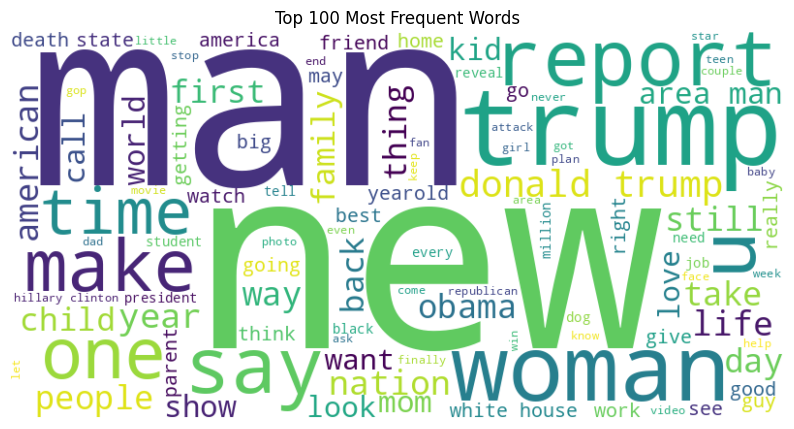

In [9]:

from wordcloud import WordCloud

# Join all cleaned text into a single string
all_words = ' '.join(df['cleaned_text'])

# Generate WordCloud with only top 100 words

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)

# Plot settings
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Frequent Words')
plt.show()


## Tokenization and Padding:

### Split the Data:

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(
    df['cleaned_text'],
    df['is_sarcastic'],
    test_size=0.3,
    random_state=42
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)


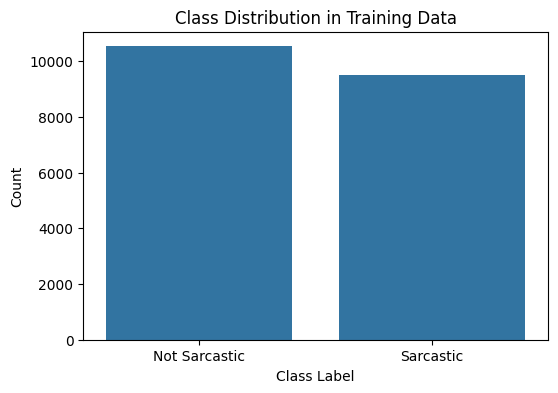

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Sarcastic', 'Sarcastic'])
plt.show()


In [12]:
X_train.sample(2)

,cleaned_text
13254,desktop zen rock garden thrown assistant
10544,report recently laidoff worker enough help eco...


In [13]:
y_train.sample(2)

,is_sarcastic
4236,0
21098,1


In [14]:
X_test.sample(2)

,cleaned_text
13884,eia china blood ivory carving factory
15591,photographer highlight kid rare genetic condit...


In [15]:
X_val.sample(2)

,cleaned_text
3519,senate vote sure
27536,texas environmentalist lobby solarpowered elec...


## Basic Tokenization workflow with keras:

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = [
     "The packaging was impressive, but the item arrived broken.",
    "Excellent customer service and fast delivery!",
    "Meh, it works... just not as well as I hoped.",
    "Terrible experience — would not recommend to anyone.",
    "Surprisingly good quality for the price.",
    "I’ve had better, but this wasn’t bad at all.",
    "The instructions were confusing and unclear.",
    "Totally exceeded my expectations!",
    "Not worth the money. I'm disappointed.",
    "A decent buy if you're not too picky."
]

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Print results
print("Word Index:", tokenizer.word_index)
print("Sequences:", sequences)


Word Index: {'<OOV>': 1, 'the': 2, 'not': 3, 'but': 4, 'and': 5, 'as': 6, 'packaging': 7, 'was': 8, 'impressive': 9, 'item': 10, 'arrived': 11, 'broken': 12, 'excellent': 13, 'customer': 14, 'service': 15, 'fast': 16, 'delivery': 17, 'meh': 18, 'it': 19, 'works': 20, 'just': 21, 'well': 22, 'i': 23, 'hoped': 24, 'terrible': 25, 'experience': 26, '—': 27, 'would': 28, 'recommend': 29, 'to': 30, 'anyone': 31, 'surprisingly': 32, 'good': 33, 'quality': 34, 'for': 35, 'price': 36, 'i’ve': 37, 'had': 38, 'better': 39, 'this': 40, 'wasn’t': 41, 'bad': 42, 'at': 43, 'all': 44, 'instructions': 45, 'were': 46, 'confusing': 47, 'unclear': 48, 'totally': 49, 'exceeded': 50, 'my': 51, 'expectations': 52, 'worth': 53, 'money': 54, "i'm": 55, 'disappointed': 56, 'a': 57, 'decent': 58, 'buy': 59, 'if': 60, "you're": 61, 'too': 62, 'picky': 63}
Sequences: [[2, 7, 8, 9, 4, 2, 10, 11, 12], [13, 14, 15, 5, 16, 17], [18, 19, 20, 21, 3, 6, 22, 6, 23, 24], [25, 26, 27, 28, 3, 29, 30, 31], [32, 33, 34, 35, 2

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer with a vocabulary size limit and out-of-vocabulary token
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

# Fit tokenizer on training data ONLY to prevent data leakage
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [18]:
# Calculate sequence lengths for percentile-based padding
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95))  # Covers 95% of sentences

In [19]:
max_len

11

In [20]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [21]:
vocab_size = len(tokenizer.word_index) + 1  # +1 for OOV token
vocab_size

21147

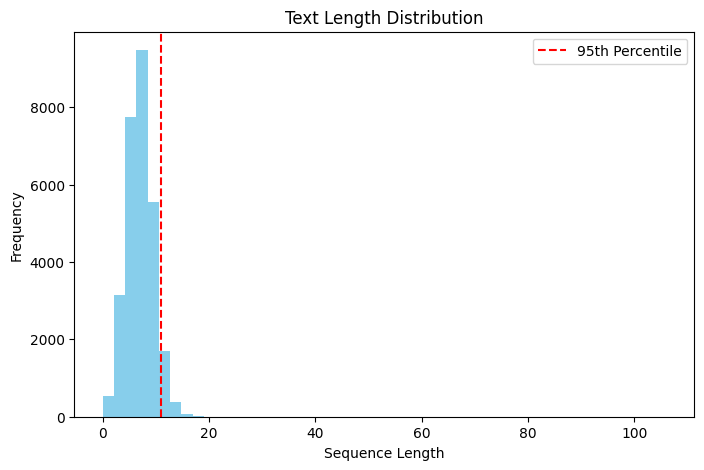

In [22]:
# Convert all cleaned text into sequences
X_seq = tokenizer.texts_to_sequences(df['cleaned_text'])

# Calculate the length of each sequence
seq_lengths_all = [len(seq) for seq in X_seq]

# Plot the distribution of sequence lengths
plt.figure(figsize=(8, 5))
plt.hist(seq_lengths_all, bins=50, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# Draw a vertical line at the 95th percentile to help choose a good maxlen
plt.axvline(np.percentile(seq_lengths_all, 95), color='red', linestyle='dashed', label='95th Percentile')
plt.legend()
plt.show()


In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense
import numpy as np

def build_rnn_model(vocab_size, max_len):
    """Build Simple RNN model """
    # Input layer
    inputs = Input(shape=(max_len,), name='input_layer')

    # Embedding layer
    embedding = Embedding(
        input_dim=vocab_size,
        output_dim=128,
        name='embedding_layer'
    )(inputs)

    # RNN layer
    rnn = SimpleRNN(64, return_sequences=False, name='rnn_layer')(embedding)

    # Output layer
    outputs = Dense(1, activation='sigmoid', name='output_layer')(rnn)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='SimpleRNN_Model')

    # Compile
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

def build_lstm_model(vocab_size, max_len):
    """Build LSTM model """
    # Input layer
    inputs = Input(shape=(max_len,), name='input_layer')

    # Embedding layer
    embedding = Embedding(
        input_dim=vocab_size,
        output_dim=128,
        name='embedding_layer'
    )(inputs)

    # LSTM layer
    lstm = LSTM(64, name='lstm_layer')(embedding)

    # Output layer
    outputs = Dense(1, activation='sigmoid', name='output_layer')(lstm)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='LSTM_Model')

    # Compile
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

def build_lstm_w2v_model(vocab_size, max_len, embedding_matrix):
    """Build LSTM with Word2Vec model """
    # Input layer
    inputs = Input(shape=(max_len,), name='input_layer')

    # Embedding layer with pretrained weights
    embedding = Embedding(
        input_dim=vocab_size,
        output_dim=100,
        weights=[embedding_matrix],
        trainable=False,
        name='word2vec_embedding'
    )(inputs)

    # LSTM layer
    lstm = LSTM(64, name='lstm_layer')(embedding)

    # Output layer
    outputs = Dense(1, activation='sigmoid', name='output_layer')(lstm)

    # Create model
    model = Model(inputs=inputs, outputs=outputs, name='LSTM_Word2Vec_Model')

    # Compile
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model




In [33]:


# 1. Simple RNN
rnn_model = build_rnn_model(vocab_size, max_len)
rnn_model.summary()


Model: "SimpleRNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_layer (Embedding)          │ (None, 11, 128)             │       2,706,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rnn_layer (SimpleRNN)                │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,719,233 (10.37 MB)

 Trainable params: 2,719,233 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:

# 2. LSTM
lstm_model = build_lstm_model(vocab_size, max_len)
lstm_model.summary()



Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_layer (Embedding)          │ (None, 11, 128)             │       2,706,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_layer (LSTM)                    │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,756,289 (10.51 MB)

 Trainable params: 2,756,289 (10.51 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# !pip install --upgrade numpy gensim


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
# import os
# os.kill(os.getpid(), 9)


In [35]:
import gensim.downloader as api


In [44]:
# Download and load pre-trained Word2Vec embeddings
word2vec_model = api.load('glove-wiki-gigaword-100')


In [45]:

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
    else:
        pass

In [46]:
# 3. LSTM with Word2Vec
lstm_w2v_model = build_lstm_w2v_model(vocab_size, max_len, embedding_matrix)
lstm_w2v_model.summary()

Model: "LSTM_Word2Vec_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ word2vec_embedding (Embedding)       │ (None, 11, 100)             │       2,114,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_layer (LSTM)                    │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,157,005 (8.23 MB)

 Trainable params: 42,305 (165.25 KB)

 Non-trainable params: 2,114,700 (8.07 MB)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Training configuration
EPOCHS = 15
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2

# Callbacks configuration
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

# Training function
def train_and_evaluate(model, X_train, y_train, X_val, y_val, model_name):
    print(f"\nTraining {model_name}...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return history



Training Simple RNN...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6978 - loss: 0.5550

314/314 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.6980 - loss: 0.5548 - val_accuracy: 0.8004 - val_loss: 0.4253
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9225 - loss: 0.2011 - val_accuracy: 0.7871 - val_loss: 0.5016
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9766 - loss: 0.0693 - val_accuracy: 0.7869 - val_loss: 0.7278
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9888 - loss: 0.0345 - val_accuracy: 0.7775 - val_loss: 0.8245


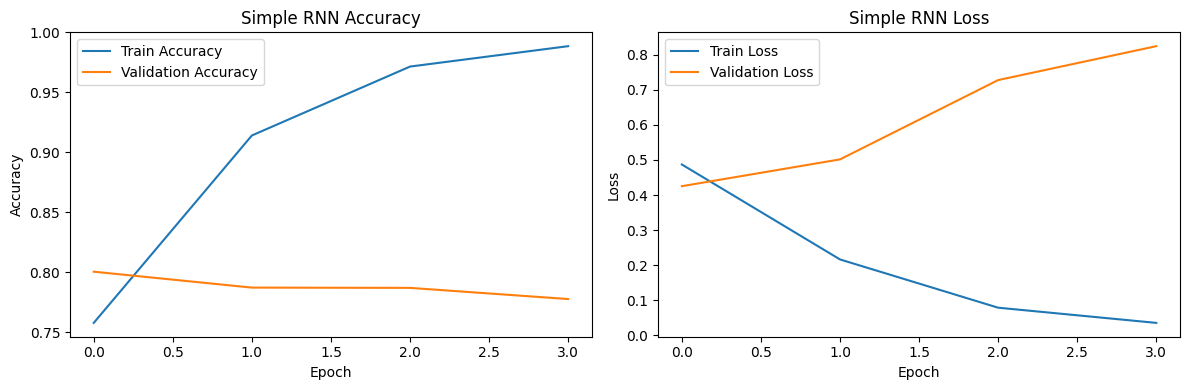

In [40]:

rnn_history = train_and_evaluate(
    rnn_model,
    X_train_pad, y_train,
    X_val_pad, y_val,
    'Simple RNN'
)





Training LSTM...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.6804 - loss: 0.5682 - val_accuracy: 0.7950 - val_loss: 0.4369
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8799 - loss: 0.2920 - val_accuracy: 0.7983 - val_loss: 0.4514
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.9211 - loss: 0.2034 - val_accuracy: 0.7906 - val_loss: 0.5160
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9481 - loss: 0.1350 - val_accuracy: 0.7899 - val_loss: 0.6150


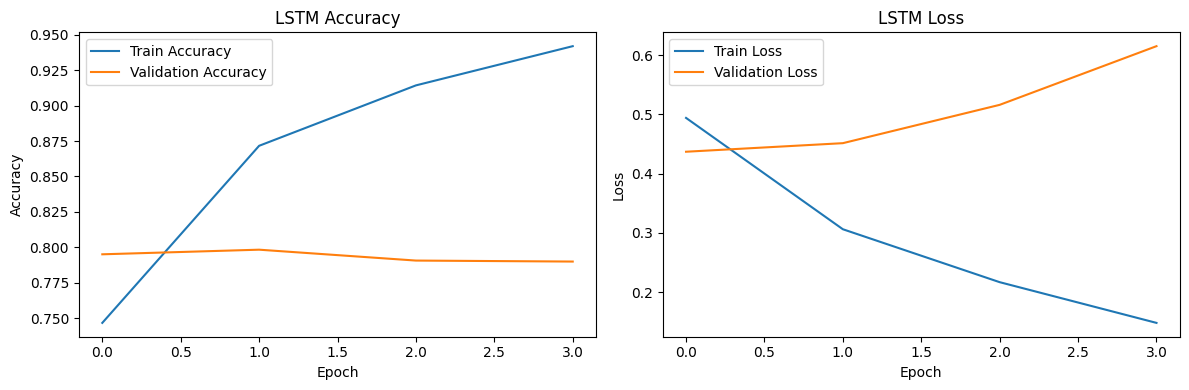

In [41]:
lstm_history = train_and_evaluate(
    lstm_model,
    X_train_pad, y_train,
    X_val_pad, y_val,
    'LSTM'
)



Training LSTM with Word2Vec...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6622 - loss: 0.6121 - val_accuracy: 0.7277 - val_loss: 0.5324
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7586 - loss: 0.4929 - val_accuracy: 0.7589 - val_loss: 0.4919
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7803 - loss: 0.4590 - val_accuracy: 0.7701 - val_loss: 0.4789
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8173 - loss: 0.3968 - val_accuracy: 0.7836 - val_loss: 0.4604
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8144 - loss: 0.3977 - val_accuracy: 0.7773 - val_loss: 0.4712
Epoch 6/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8476 - loss: 0.3455 - val_accuracy: 0.7901 - val_loss: 0.4519
Epoch 7/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8578 - loss: 0.3226 - val_accuracy: 0.7894 - val_loss: 0.4700
Epoch 8/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy

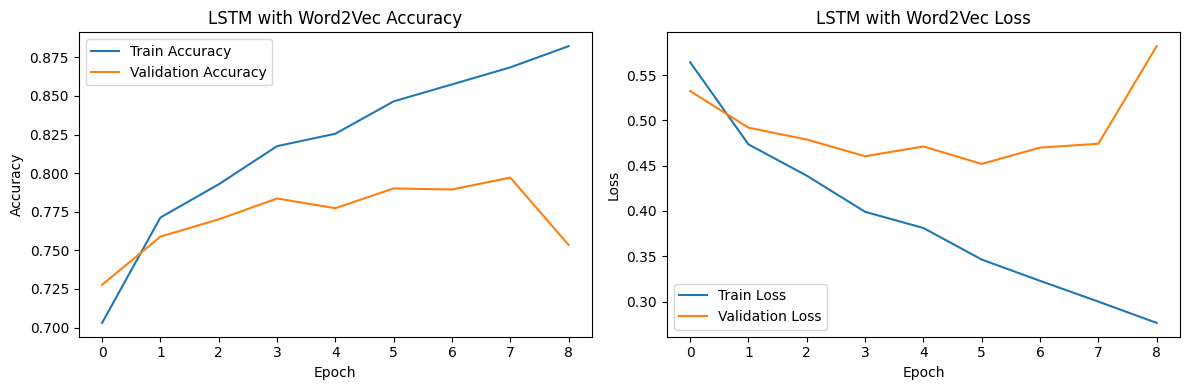

In [47]:

lstm_w2v_history = train_and_evaluate(
    lstm_w2v_model,
    X_train_pad, y_train,
    X_val_pad, y_val,
    'LSTM with Word2Vec'
)



In [ ]:

# Save models
rnn_model.save('rnn_model.h5')
lstm_model.save('lstm_model.h5')
lstm_w2v_model.save('lstm_w2v_model.h5')


Evaluating SimpleRNN_Model on test set...
Test Accuracy: 0.8092
Test Loss: 0.4185
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.87      0.83      2237
        True       0.84      0.75      0.79      2056

    accuracy                           0.81      4293
   macro avg       0.81      0.81      0.81      4293
weighted avg       0.81      0.81      0.81      4293



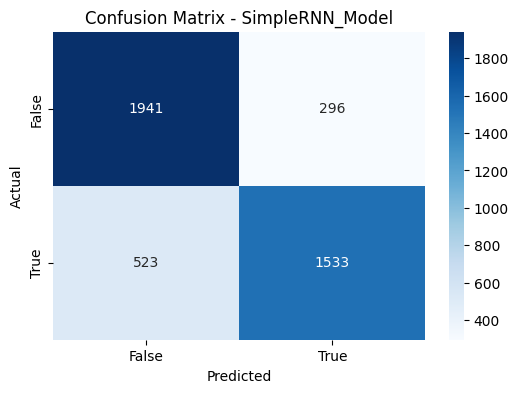


Evaluating LSTM_Model on test set...
Test Accuracy: 0.8029
Test Loss: 0.4276
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.82      0.81      2237
        True       0.80      0.78      0.79      2056

    accuracy                           0.80      4293
   macro avg       0.80      0.80      0.80      4293
weighted avg       0.80      0.80      0.80      4293



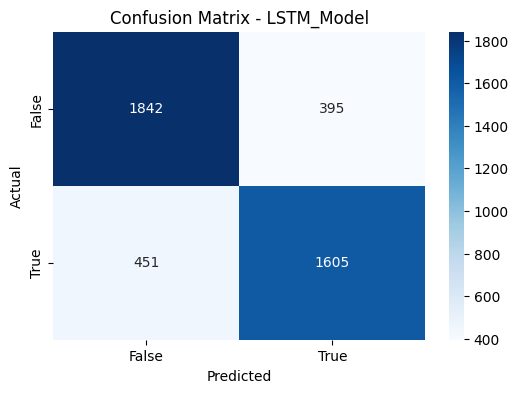


Evaluating LSTM_Word2Vec_Model on test set...
Test Accuracy: 0.7892
Test Loss: 0.4428
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.78      0.80      2237
        True       0.77      0.79      0.78      2056

    accuracy                           0.79      4293
   macro avg       0.79      0.79      0.79      4293
weighted avg       0.79      0.79      0.79      4293



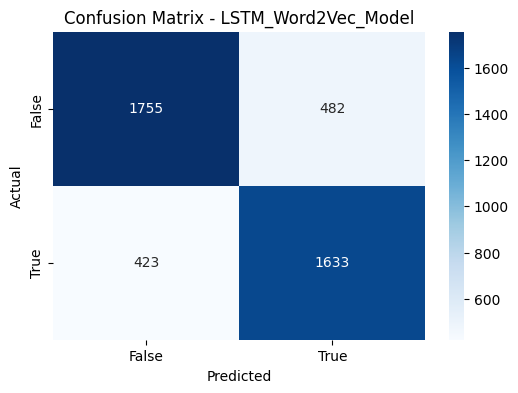

In [48]:

# Evaluation function
def evaluate_model(model, X_test, y_test):
    print(f"\nEvaluating {model.name} on test set...")
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Loss: {loss:.4f}")

    # Generate predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Classification report
    from sklearn.metrics import classification_report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['False', 'True']))

    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'])
    plt.title(f'Confusion Matrix - {model.name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate all models
evaluate_model(rnn_model, X_test_pad, y_test)
evaluate_model(lstm_model, X_test_pad, y_test)
evaluate_model(lstm_w2v_model, X_test_pad, y_test)